In [3]:
import numpy as np 
import hyperimpute

In [ ]:
# Create dataset with NAs

np.random.seed(0)
X_full = np.random.rand(100, 5)
M = np.random.rand(100, 5) < 0.1
X = X_full.copy()
X[M] = np.nan

X[:5,:]

array([[0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ],
       [0.64589411, 0.43758721,        nan, 0.96366276, 0.38344152],
       [0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606],
       [0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215],
       [0.97861834, 0.79915856,        nan, 0.78052918,        nan]])

In [17]:
from hyperimpute.plugins.imputers import Imputers

# List of hyperimpute methods:

imputers = Imputers()
imputers.list()


['ice',
 'sinkhorn',
 'hyperimpute',
 'miwae',
 'mean',
 'missforest',
 'most_frequent',
 'miracle',
 'softimpute',
 'gain',
 'mice',
 'nop',
 'sklearn_ice',
 'median',
 'EM',
 'sklearn_missforest']

In [18]:
methods = imputers.list()

all_imputations = {}

for method in methods:
    print(method)
    imputer = Imputers().get(method)
    X_imputed = imputer.fit_transform(X.copy())
    all_imputations[method] = X_imputed

ice
sinkhorn
hyperimpute
miwae
mean
missforest
most_frequent
miracle


W0000 00:00:1730728863.598686    5352 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


softimpute
gain
mice
nop
sklearn_ice
median
EM
sklearn_missforest


/home/chris/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/chris/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/chris/anaconda3/lib/python3.11/site-packages/hyperimpute/plugins/imputers/plugin_EM.py:165: RuntimeWarning: Degrees of freedom <= 0 for slice
  Sigma = np.cov(
/home/chris/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/chris/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/chris/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [36]:
all_imputations.keys()

dict_keys(['ice', 'sinkhorn', 'hyperimpute', 'miwae', 'mean', 'missforest', 'most_frequent', 'miracle', 'softimpute', 'gain', 'mice', 'nop', 'sklearn_ice', 'median', 'EM', 'sklearn_missforest'])

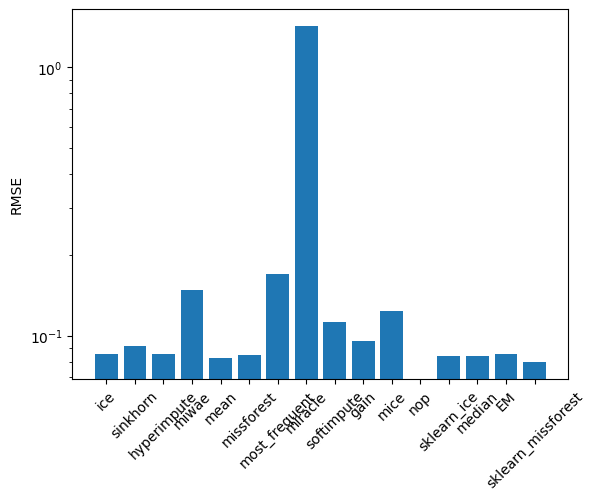

In [33]:
def rmse(X, Y):
    return np.sqrt(np.mean((X - Y)**2))

rmse_values = {method: rmse(X_full, all_imputations[method]) for method, _ in all_imputations.items()}

# bar plot

import matplotlib.pyplot as plt

plt.bar(range(len(rmse_values)), list(rmse_values.values()), align='center')
plt.xticks(range(len(rmse_values)), list(rmse_values.keys()), rotation=45)
plt.ylabel('RMSE')
plt.yscale('log')
plt.show()

In [38]:
all_imputations["nop"]

,0,1,2,3,4
0,0.548814,0.715189,0.602763,0.544883,0.423655
1,0.645894,0.437587,NaN,0.963663,0.383442
2,0.791725,0.528895,0.568045,0.925597,0.071036
3,0.087129,0.020218,0.832620,0.778157,0.870012
4,0.978618,0.799159,NaN,0.780529,NaN
...,...,...,...,...,...
95,0.750765,0.699575,0.967966,0.994401,0.451822
96,0.070870,0.292794,0.152355,0.417486,0.131289
97,0.604118,0.382808,0.895386,0.967795,0.546885
98,NaN,0.592230,0.896761,0.406733,0.552078
